2025-05-08 19:48:20.272991: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746733700.518559      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746733700.590157      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 20000 files belonging to 2 classes.
Using 16000 files for training.


I0000 00:00:1746733734.990078      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Found 20000 files belonging to 2 classes.
Using 4000 files for validation.
Found 5000 files.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Phase 1: Training with frozen base model...
Epoch 1/15


I0000 00:00:1746733809.661581     100 cuda_dnn.cc:529] Loaded cuDNN version 90300


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5907 - auc: 0.6209 - loss: 0.7821 - precision: 0.5974 - recall: 0.5746
Epoch 1: val_accuracy improved from -inf to 0.68475, saving model to best_dog_cat_model_resnet.keras
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 93s 76ms/step - accuracy: 0.5907 - auc: 0.6210 - loss: 0.7820 - precision: 0.5974 - recall: 0.5746 - val_accuracy: 0.6848 - val_auc: 0.7274 - val_loss: 0.7959 - val_precision: 0.6926 - val_recall: 0.6834
Epoch 2/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6360 - auc: 0.6889 - loss: 0.6402 - precision: 0.6480 - recall: 0.6074
Epoch 2: val_accuracy improved from 0.68475 to 0.74800, saving model to best_dog_cat_model_resnet.keras
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 74s 74ms/step - accuracy: 0.6360 - auc: 0.6889 - loss: 0.6402 - precision: 0.6480 - recall: 0.6074 - val_accuracy: 0.7480 - val_auc: 0.8154 - val_loss: 0.5928 - val_precision: 0.7355 - val_recall: 0.7876
Epoch 3/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step -

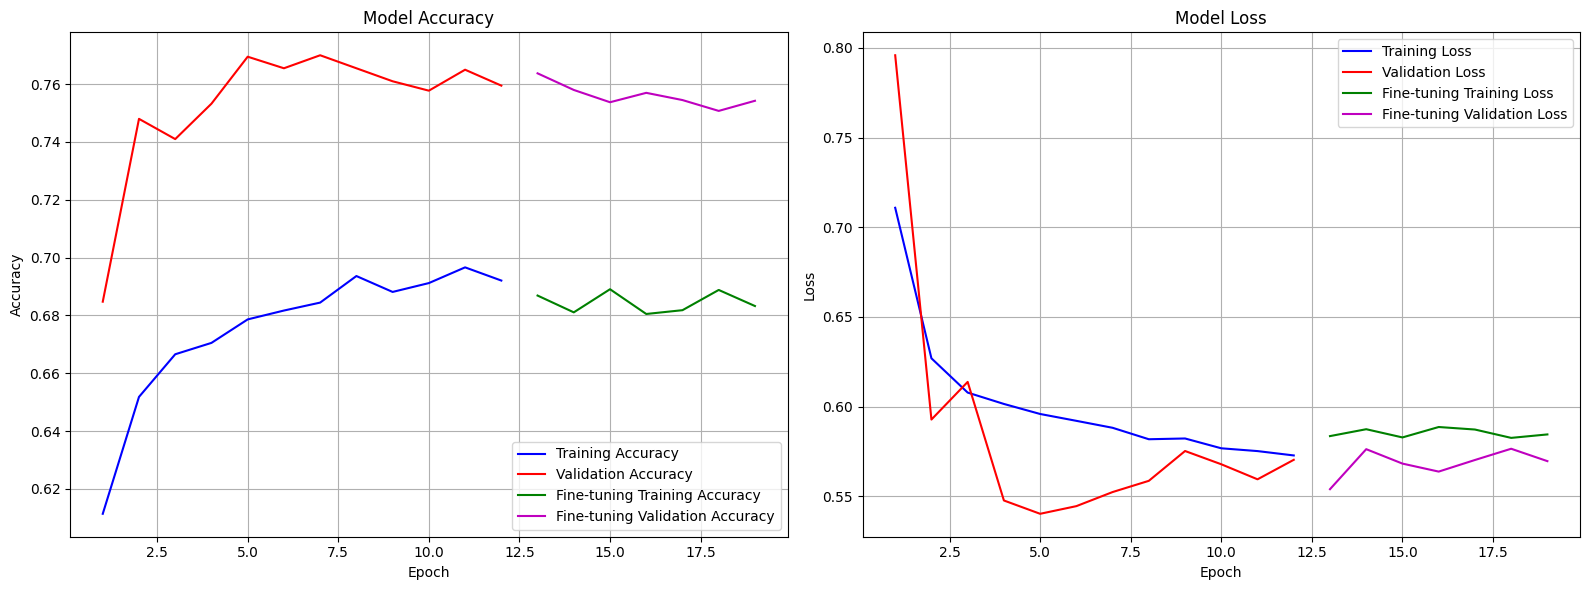

Saved artifact at '/tmp/tmpxr4x5npa'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_175')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140198071874192: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  140198071874768: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  140198071871888: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  140198471614736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140198471616080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140198471615312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140198471615888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140198471614928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140198471615696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140198471618576: TensorSpec(shape=(), dtype=tf.resour

W0000 00:00:1746735247.991343      31 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1746735247.991386      31 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1746735248.157515      31 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled


Model training complete and model saved!


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Input, GlobalAveragePooling2D, Normalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50

import matplotlib.pyplot as plt

train_data = tf.keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/dogs-vs-cats/train',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=16,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training',
    verbose=True,
)

val_data = tf.keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/dogs-vs-cats/train',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=16,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
    verbose=True,
)

test_data = tf.keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/dogs-vs-cats/test',
    labels=None,
    color_mode='rgb',
    batch_size=16,
    image_size=(256, 256),
    shuffle=False,
    verbose=True,
)

AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
val_data = val_data.prefetch(buffer_size=AUTOTUNE)
test_data = test_data.prefetch(buffer_size=AUTOTUNE)

data_augmentation = Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1)
])

def build_model():
    base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(256, 256, 3)
    )
    
    base_model.trainable = False
    
    inputs = Input(shape=(256, 256, 3))
    
    normalizer = Normalization(axis=-1)
    normalizer.adapt(train_data.map(lambda x, y: x))
    
    x = normalizer(inputs)
    x = data_augmentation(x)
    x = tf.keras.applications.resnet50.preprocess_input(x)
    x = base_model(x, training=False)
    
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    return Model(inputs, outputs)

model = build_model()

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=train_data.cardinality().numpy() // 2,
    decay_rate=0.9,
    staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=7,
        restore_best_weights=True,
        verbose=1
    ),
    ModelCheckpoint(
        'best_dog_cat_model_resnet.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )
]

print("Phase 1: Training with frozen base model...")
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    callbacks=callbacks,
    verbose=1
)

print("Phase 2: Fine-tuning the model...")
base_model = model.layers[3]
base_model.trainable = True

for layer in base_model.layers[:250]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

fine_tune_history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=callbacks,
    verbose=1
)

val_results = model.evaluate(val_data, verbose=1)
print(f"Final Validation Loss: {val_results[0]:.4f}")
print(f"Final Validation Accuracy: {val_results[1]:.4f}")
print(f"Final Validation AUC: {val_results[2]:.4f}")
print(f"Final Validation Precision: {val_results[3]:.4f}")
print(f"Final Validation Recall: {val_results[4]:.4f}")

def plot_training_history(history, fine_tune_history=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    epochs_initial = range(1, len(history.history['accuracy']) + 1)
    ax1.plot(epochs_initial, history.history['accuracy'], 'b-', label='Training Accuracy')
    ax1.plot(epochs_initial, history.history['val_accuracy'], 'r-', label='Validation Accuracy')
    
    if fine_tune_history:
        epochs_fine = range(len(history.history['accuracy']) + 1, 
                          len(history.history['accuracy']) + len(fine_tune_history.history['accuracy']) + 1)
        ax1.plot(epochs_fine, fine_tune_history.history['accuracy'], 'g-', label='Fine-tuning Training Accuracy')
        ax1.plot(epochs_fine, fine_tune_history.history['val_accuracy'], 'm-', label='Fine-tuning Validation Accuracy')
    
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)
    
    ax2.plot(epochs_initial, history.history['loss'], 'b-', label='Training Loss')
    ax2.plot(epochs_initial, history.history['val_loss'], 'r-', label='Validation Loss')
    
    if fine_tune_history:
        epochs_fine = range(len(history.history['loss']) + 1, 
                          len(history.history['loss']) + len(fine_tune_history.history['loss']) + 1)
        ax2.plot(epochs_fine, fine_tune_history.history['loss'], 'g-', label='Fine-tuning Training Loss')
        ax2.plot(epochs_fine, fine_tune_history.history['val_loss'], 'm-', label='Fine-tuning Validation Loss')
    
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()

plot_training_history(history, fine_tune_history)

model.save('complete_dog_cat.keras')

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('dog_cat_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model training complete and model saved!")

def predict_image(image_path, model):
    img = image.load_img(image_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    
    predictions = model.predict(img_array)
    score = predictions[0][0]
    
    if score > 0.5:
        return f"Dog ({score:.2f})"
    else:
        return f"Cat ({1-score:.2f})"